<a href="https://colab.research.google.com/github/Rosari03/Metodos-Numericos/blob/main/Coparacion_de_Metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $COMPARACION$ $DE$ $METODOS$ $DE$ $INTERPOLACION$

 En el siguiente codigo podemos observar una comparacion de los polinomios que obtenemos con los siguientes metodos de interpolacion


*   Método de diferencias divididas de Newton
*   Hermite
*   Lagrange





In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
def hermite(x, y, z):
    n = len(x)
    m = 2 * n
    Q = [[0.0 for _ in range(m)] for _ in range(m)]
    X = [0.0 for _ in range(m)]

    for i in range(n):
        X[2*i] = X[2*i+1] = x[i]
        Q[2*i][0] = Q[2*i+1][0] = y[i]
        Q[2*i+1][1] = z[i]
        if i != 0:
            Q[2*i][1] = (Q[2*i][0] - Q[2*i-1][0]) / (X[2*i] - X[2*i-1])

    for i in range(2, m):
        for j in range(2, i+1):
            Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (X[i] - X[i-j])

    return Q, X

def construir_polinomio(Q, X):
    x = sp.Symbol('x')
    n = len(X)
    polinomio = Q[0][0]
    producto = 1

    for i in range(1, n):
        producto *= (x - X[i-1])
        polinomio += Q[i][i] * producto

    return sp.expand(polinomio)

def difdiv(X, y):
    n = len(X)
    mat = np.zeros((n, n), dtype=object)
    for i in range(n):
        mat[i, 0] = y[i]
    for j in range(1, n):
        for i in range(n-j):
            mat[i, j] = (mat[i+1, j-1] - mat[i, j-1]) / (X[i+j] - X[i])
    return mat

def newton_interpolacion(X, tabla):
    x = sp.Symbol('x')
    n = len(X)
    pol = tabla[0,0]
    prod = 1
    for i in range(1, n):
        prod *= (x - X[i-1])
        pol += tabla[0,i] * prod
    return sp.expand(pol)

def lagrange(X, Y, x):
    assert len(X) == len(Y), "Tamaño diferente"
    Px = 1
    Lag = 0
    for i in range(len(X)):
        for j in range(len(X)):
            if j != i:
                Px *= (x - X[j]) / (X[i] - X[j])
        Lag += Y[i] * Px
        Px = 1
    return sp.expand(Lag)



In [9]:

f = lambda x: 1 / (1 + 25 * x**2)
df = lambda x: -50 * x / (1 + 25 * x**2)**2

# 9 puntos igualmente espaciados
x_vals = np.linspace(-1, 1, 9)
y_vals = f(x_vals)
z_vals = df(x_vals)

# Interpolación de Hermite
Q, X_hermite = hermite(x_vals, y_vals, z_vals)
P_hermite = construir_polinomio(Q, X_hermite)


# Interpolación de Newton
tabla = difdiv(x_vals, y_vals)
P_newton = newton_interpolacion(x_vals, tabla)


# Interpolación de Lagrange
x = sp.Symbol('x')
P_lagrange = lagrange(x_vals, y_vals, x)




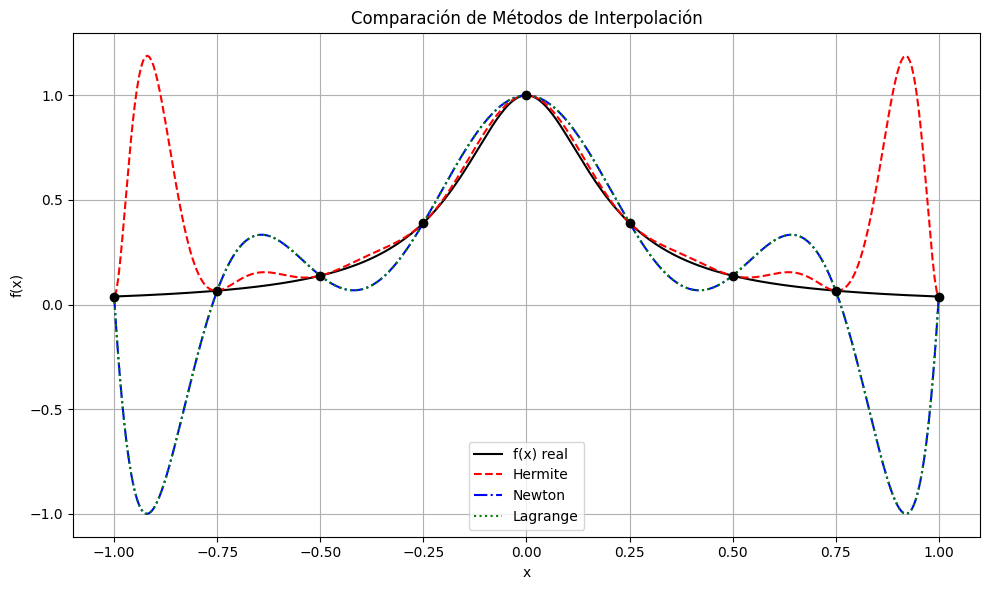

In [10]:

f_interp = sp.lambdify(x, f(x))
f_hermite = sp.lambdify(x, P_hermite)
f_newton = sp.lambdify(x, P_newton)
f_lagrange = sp.lambdify(x, P_lagrange)

xx = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))
plt.plot(xx, f_interp(xx), 'k-', label='f(x) real')
plt.plot(xx, f_hermite(xx), 'r--', label='Hermite')
plt.plot(xx, f_newton(xx), 'b-.', label='Newton')
plt.plot(xx, f_lagrange(xx), 'g:', label='Lagrange')
plt.scatter(x_vals, y_vals, color='black', zorder=5)
plt.title("Comparación de Métodos de Interpolación")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Como podemos observar en el grafico, el polinomio que mas se acerco a nuestra funcion es el polinomio de $Hermite$ ya que este aparte de tomar los puntos x y y  toma las derivadas de estos puntos, lo cual nos ayuda a generar el polinomio con un poco mas de presicion

Por otro lado el polinomio de Lagrange y el de Newton se aproximaron al mismo polinomio .

Como vemos los 3 metodos fueron cercanos a nuestro polinomio original, pero en definitiva el que fue mas acertado fue el polinomio de $Hermite$